In [14]:
import plotly.express as px
import json
import pandas as pd


In [32]:
df = pd.read_csv('idealista_search.csv')

In [33]:
len(df)

450

In [18]:
df.describe()

,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.420000,159778.800000,91.060000,3.040000,1.520000,43.359873,-8.408474,1852.120000
std,8.169355,33740.245553,25.135072,1.324186,0.543609,0.009082,0.010632,573.281625
min,7.000000,80000.000000,45.000000,1.000000,1.000000,43.351287,-8.424453,1095.000000
25%,20.000000,139225.000000,72.750000,2.000000,1.000000,43.353095,-8.418223,1525.500000
50%,24.500000,156950.000000,92.000000,3.000000,1.500000,43.354905,-8.410246,1697.500000
75%,29.000000,193750.000000,110.500000,3.000000,2.000000,43.363983,-8.401350,2087.750000
max,47.000000,200000.000000,140.000000,6.000000,3.000000,43.381691,-8.388842,3889.000000


In [19]:
df.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'status', 'newDevelopment', 'hasLift',
       'priceByArea', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'topNewDevelopment', 'superTopHighlight', 'detailedType.typology',
       'suggestedTexts.subtitle', 'suggestedTexts.title', 'labels',
       'detailedType.subTypology', 'neighborhood',
       'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice'],
      dtype='object')

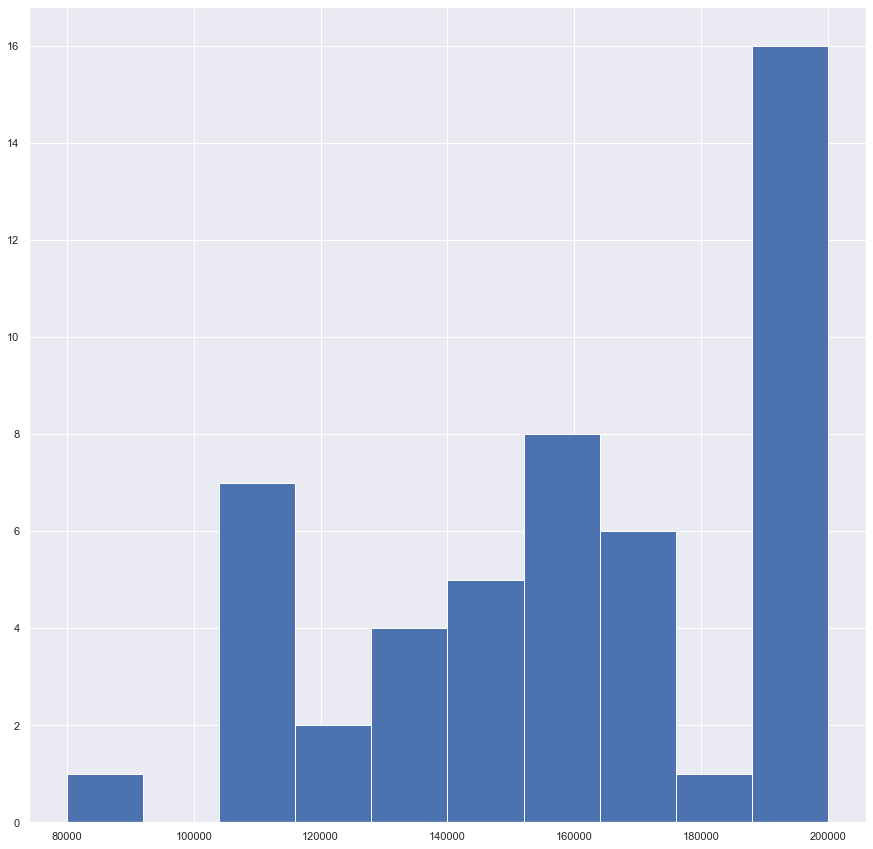

In [20]:
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.show()

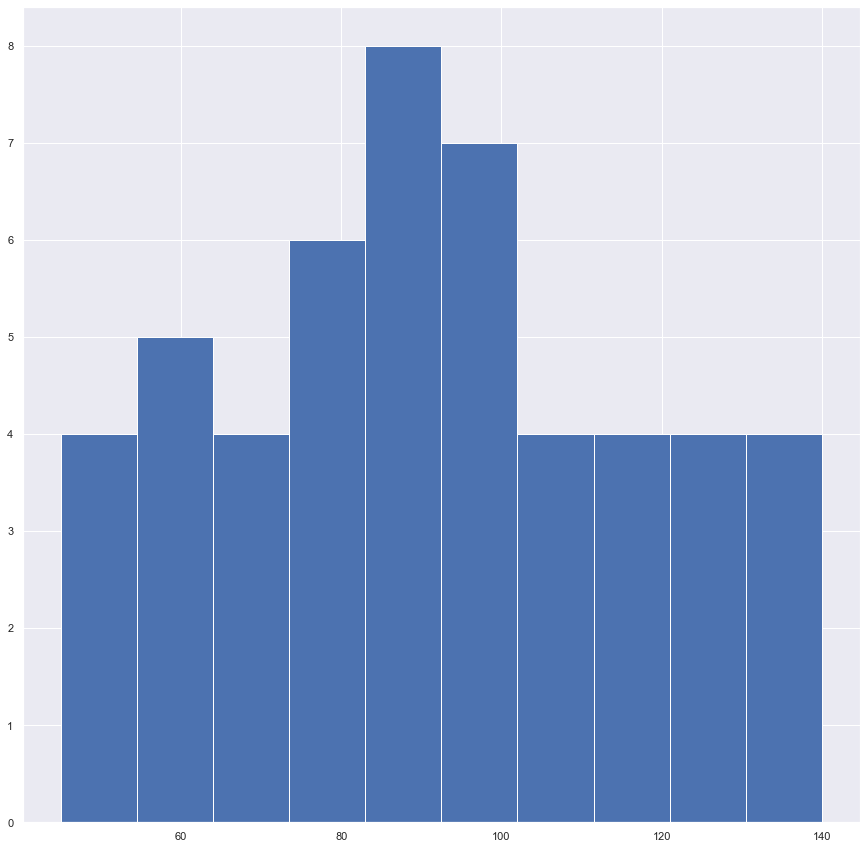

In [21]:
plt.hist(df['size'])
plt.show()

Text(0, 0.5, 'Size')

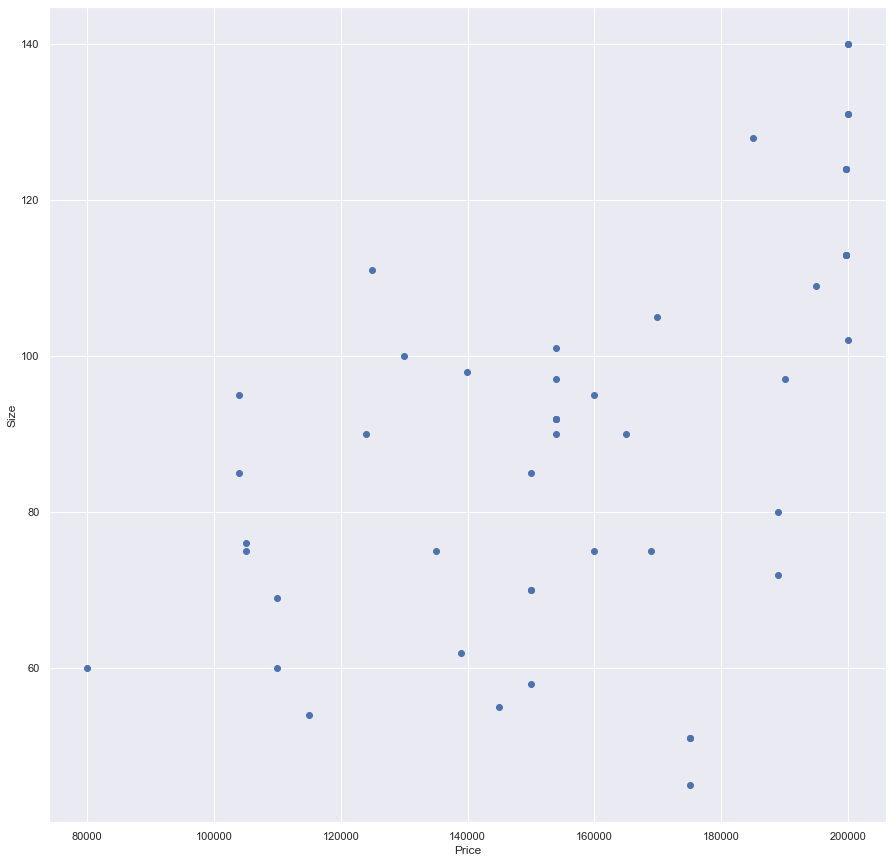

In [22]:
plt.scatter(df['price'], df['size'])
plt.xlabel('Price')
plt.ylabel('Size')

Text(0, 0.5, 'Rooms')

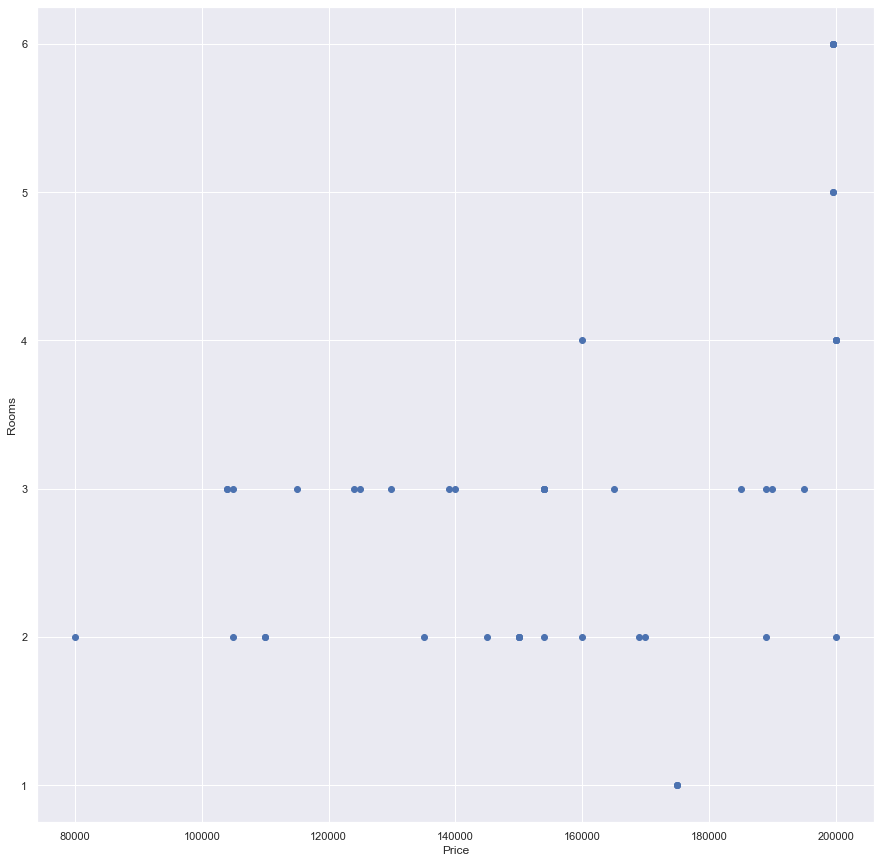

In [23]:
plt.scatter(df['price'], df['rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')

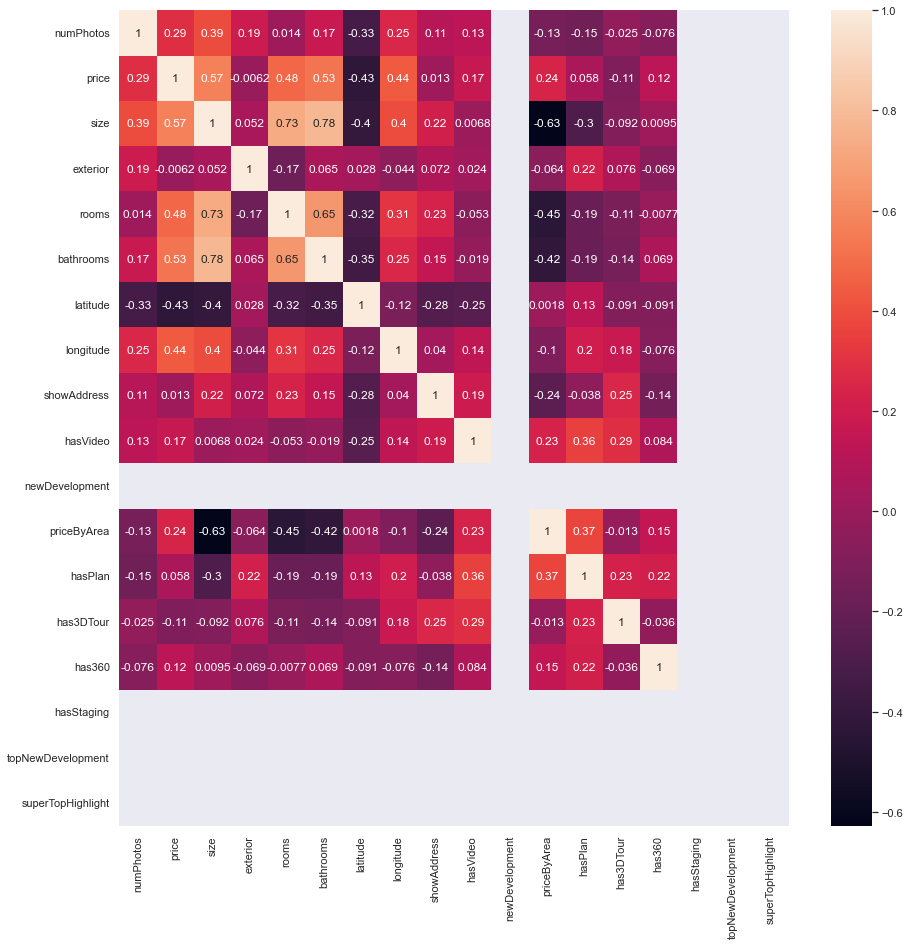

In [24]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)
sn.set(rc={'figure.figsize':(15,15)})
plt.show()


In [25]:

df.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'status', 'newDevelopment', 'hasLift',
       'priceByArea', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'topNewDevelopment', 'superTopHighlight', 'detailedType.typology',
       'suggestedTexts.subtitle', 'suggestedTexts.title', 'labels',
       'detailedType.subTypology', 'neighborhood',
       'parkingSpace.hasParkingSpace',
       'parkingSpace.isParkingSpaceIncludedInPrice'],
      dtype='object')

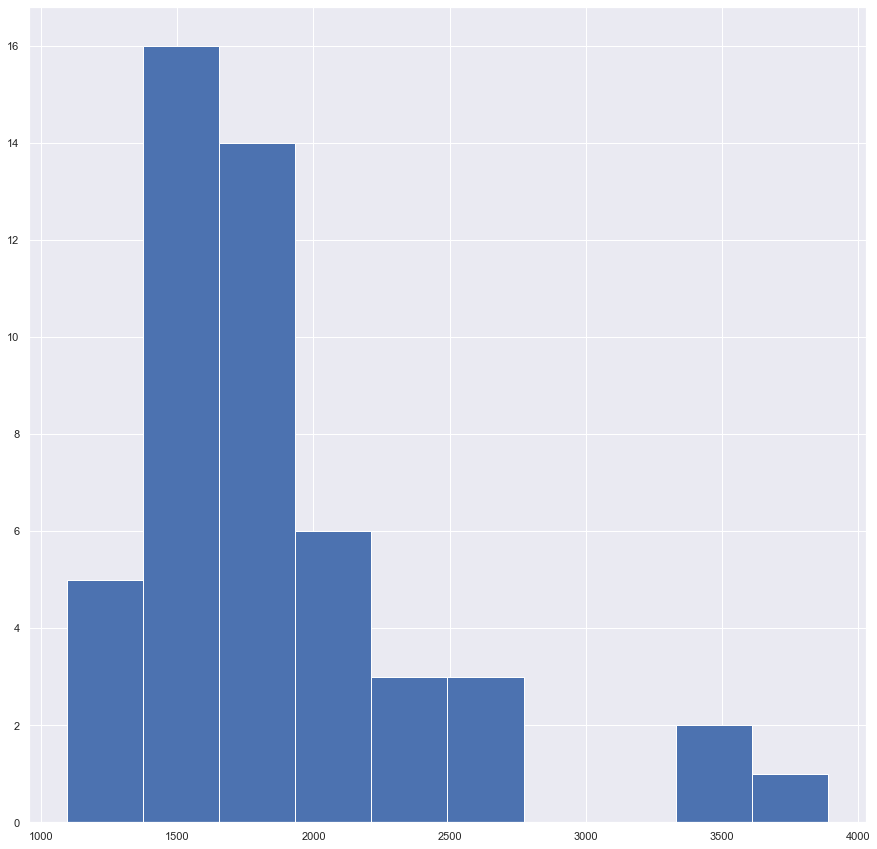

In [26]:
plt.hist(df['priceByArea'])
plt.show()

In [45]:
df.sort_values(by='priceByArea', ascending = True)
df_temp = df[df['priceByArea'] < 2000]
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="priceByArea", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="priceByArea",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [48]:
df_temp = df[df['price'] < 150000]
# 
color_scale = [(0, 'blue'), (1,'red')]
fig = px.scatter_mapbox(df_temp, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="price", 
                        hover_data=["priceByArea","price","size","rooms","url"],
                        color="priceByArea",
                        color_continuous_scale=color_scale,
                        size="price",
                        zoom=13,
                        height=800,
                        width=800)
# fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_style="carto-positron") 
# fig.update_layout(mapbox_style="stamen-terrain")
# fig.update_layout(mapbox_style="satellite") -> Need Mapbox API
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [44]:
df[(df['price']==200000) & (df['priceByArea']==1961)]['url']

27     https://www.idealista.com/inmueble/97827864/
166    https://www.idealista.com/inmueble/99139846/
Name: url, dtype: object

In [54]:
df[df['price']==80000]['url']

3      https://www.idealista.com/inmueble/98951857/
218    https://www.idealista.com/inmueble/99128660/
Name: url, dtype: object

In [38]:
df[df['price']==110000]

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,detailedType.typology,suggestedTexts.subtitle,suggestedTexts.title,labels,detailedType.subTypology,neighborhood,parkingSpace.hasParkingSpace,parkingSpace.isParkingSpaceIncludedInPrice,parkingSpace.parkingSpacePrice,newDevelopmentFinished
6,6,93642827,https://img3.idealista.com/blur/WEB_LISTING/0/...,3969B,21,5,110000.0,flat,sale,60.0,...,flat,"Os Mallos, A Coruña","Piso en Calle Pedroso, 15",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,98749461,https://img3.idealista.com/blur/WEB_LISTING/0/...,199,14,5,110000.0,flat,sale,69.0,...,flat,"Monte Alto - Zalaeta - Atocha, A Coruña",Piso en Vereda Polvorín,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,8,97504338,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,10,1,110000.0,flat,sale,104.0,...,flat,"Los Castros - Castrillón, A Coruña","Piso en Ronda de Outeiro, 23",NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,37,98794532,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,19,6,110000.0,flat,sale,88.0,...,flat,"Agra del Orzán - Ventorrillo, A Coruña","Piso en Alcalde Lens, 34",NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,47,94894144,https://img3.idealista.com/blur/WEB_LISTING/0/...,3349,34,1,110000.0,flat,sale,89.0,...,flat,"Agra del Orzán - Ventorrillo, A Coruña",Piso en Calle Alcalde Lens,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,49,98859113,https://img3.idealista.com/blur/WEB_LISTING/0/...,3527,26,8,110000.0,flat,sale,78.0,...,flat,"Riazor - Los Rosales, A Coruña",Piso en Ronda de Outeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,3,98859113,https://img3.idealista.com/blur/WEB_LISTING/0/...,3527,26,8,110000.0,flat,sale,78.0,...,flat,"Riazor - Los Rosales, A Coruña",Piso en Ronda de Outeiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,23,98547036,https://img3.idealista.com/blur/WEB_LISTING/0/...,3421-07918,29,3,110000.0,flat,sale,63.0,...,flat,"Os Mallos, A Coruña",Piso en Ramon Cabanillas,NaN,NaN,NaN,True,False,20000.0,NaN
274,24,99216280,https://img3.idealista.com/blur/WEB_LISTING/90...,00681,16,1,110000.0,flat,sale,62.0,...,flat,"Monte Alto - Zalaeta - Atocha, A Coruña",Piso en MAROLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,14,98129311,https://img3.idealista.com/blur/WEB_LISTING/0/...,3493,29,5,110000.0,flat,sale,74.0,...,flat,"Los Castros - Castrillón, A Coruña",Piso en Avenida de Oza,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df[df['propertyCode']==98749461]['url']

8    https://www.idealista.com/inmueble/98749461/
Name: url, dtype: object